# MeetUp DPPFCRM (Gerência Analytics Produtos): Carlo 10/08/2021

Primeiro, vamos entender o problema de aprendizado supervisionado sob a ótica do Empirical Risk Minimization para entender oque fazemos usualmente e onde as limitações podem surgir.

# Aprendizado Supervisionado AS-IS

O problema do aprendizado supervisionado é formulado como:

Sejam $X$ e $Y$ variáveis aleatórias com distribuição $(X,Y) \sim \mathscr{D}$ definida em $\mathscr{X}\times\mathscr{Y}$, em que $\mathscr{X}$ é o espaço de atributos e $\mathscr{Y}$ é o espaço de possíveis valores da target, e

$$S = ((x_1, y_1), (x_2, y_2), \cdots, (x_m, y_m)),$$

um conjunto de exemplos amostrados de forma aleatória, de forma  **independente e identicamente distribuída** (**iid**) da distribuição $\mathscr{D}$.

Fixado $\mathscr{H}$, chamado de conjunto de hipóteses, subconjunto de $\mathscr{Y}^{\mathscr{X}}$ (espaço de todas as funções de $\mathscr{X}$ para $\mathscr{Y}$), queremos encontrar uma hipótese

$$ h \in \mathscr{H}, $$

que aproxime **bem** a relação de dependência determinada pela distribuição condicional $\mathbb{P}(Y | X = x)$ para $x\in \mathscr{X}$. Isto é, esperamos que $Y\approx h(X)$.

A noção de aproximar bem é formalizada a partir da noção de **risco de uma hipótese** $h$, definida, a partir de uma função de custo $\ell(\hat{y}, y)$ que quantifica nossa perda associada a um erro, como

$$ R(h) = \underset{(X,Y) \sim \mathscr{D}}{\mathbb{E}} \left[ \ell(h(X), Y) \right].  $$

Alguns exemplos clássicos de função de perda são

- Perda 0-1: $\ell(\hat{y}, y) = \mathbb{1}{(\hat{y} \neq y)}$;

- Perda quadrática: $\ell(\hat{y}, y) = (\hat{y} - y)^2$ etc.

O risco de uma hipótese não é diretamente acessível já que não temos conhecimento de $\mathscr{D}$. Entretanto, podemos acompanhar o risco através do **risco empírico**, calculado na nossa amostra $S$ como

$$ \widehat{R}_S(h) = \frac{1}{m} \sum_{i=1}^m \ell(h(x_i), y_i) \,. $$

A partir daqui é possível seguir duas abordagens:

## Estimação da densidade

Aqui, usamos alguma técnica para aproximar $\mathscr{D}$ e a partir da distribuição estimada $\widehat{\mathscr{D}}$ calcular o classificador ótimo de Bayes a partir da teoria de decisão. Por exemplo, no caso da perda 0-1, é possível demonstrar que

$$ h_{\textrm{Bayes}}(x) = \underset{y\in \mathscr{Y}}{\arg\max}  \widehat{\mathbb{P}} (y | x).  $$

Alguns exemplos clássicos de modelos que usam essa abordagem: LDA, QDA, Naive-Bayes, One-Dependence Estimators, k-Nearest Neighbors etc.

## Minimização do Risco Empírico

Essa abordagem (ou alguma variação dela) é a que a maior parte dos algoritmos de Aprendizado de Máquina segue. Ela consiste em encontrar, dentro do meu conjunto de funções admissíveis $\mathscr{H}$, aquela que melhor cumpre a tarefa de reduzir o risco empírico (que esperamos ser próximo do risco real). Matematicamente, escolhemos

$$ h_S^{\textrm{ERM}} = \underset{h\in \mathscr{H}}{\arg\min} \widehat{R}_S(h).$$

Usualmente, com o auxílio de algum algoritmo de minimização navegamos no espaço de hipóteses encontrando um bom candidato para 
$h_S^{\textrm{ERM}}$. Essa é a abordagem de algoritmos clássicos como a regressão linear, regressão logística, perceptrons, redes neurais, support vector machines, árvores de decisão, ensembles desses modelos etc.


### Generalização

Como o espaço de hipóteses $\mathscr{H}$ deve ser escolhido? Com um conjunto de hipóteses **complexo** é possível encontrar uma função de predição com erro baixíssimo na amostra $S$. Com um conjunto menos complexo, estamos admitindo um risco empírico maior. Mas qual dos dois nos dará um risco menor na distribuição $\mathscr{D}$?

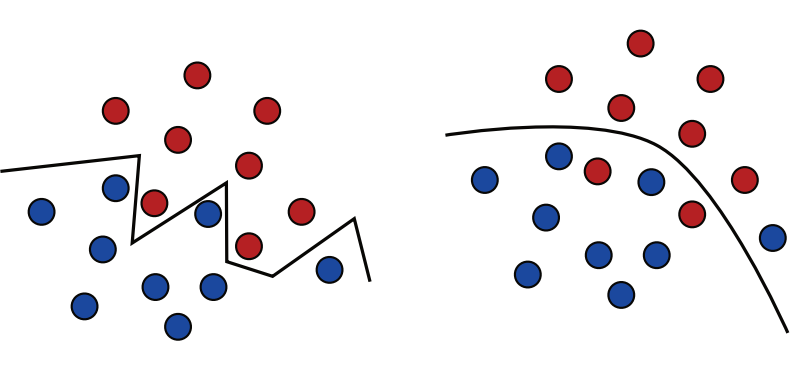

Em alguns casos, apesar de estarmos alcançando riscos baixos nos dados da nossa amostra, podemos estar generalizando para o risco real de forma pobre. Esse problema motiva a criação do conceito de **erro de generalização** definido como

$$ R(h) - \widehat{R}_S(h).$$

Apesar de o nosso modelo fazer um bom trabalho em treino, ele pode estar sofrendo **overfitting** aprendendo particularidades do dataset que não se estendem para a distribuição original, está se concentrando em aprender as **correlações espúrias**.

Noções de complexidade do espaço de hipóteses como a **dimensão-VC** e a **complexidade de Rademacher** nos ajudam a quantificar o quão distantes essas grandezas podem estar e nos dão limites para compará-las, como o teorema a seguir.

**Teorema**: Seja $\mathscr{H}$ uma família de funções que assume valores em $\mathscr{Y} = \{-1, +1 \}$ com dimensão-VC $d_{VC}$. Então, para todo $\delta>0$, com probabilidade maior ou igual a $1-\delta$, vale que $\forall h \in \mathscr{H}$:

$$ \underbrace{R(h)}_\textrm{risco (out of sample)} \leq \underbrace{\widehat{R}_S(h)}_\textrm{risco empírico (in sample)} + \underbrace{\sqrt{\frac{2 d_{VC} \log \frac{e m}{d_{VC}}}{m}} + \sqrt{\frac{\log \frac{1}{\delta}}{2m}}}_\textrm{erro de generalização} .$$

Estratégias de **seleção de modelos** utilizando validação cruzada (utilização de uma amostra externa para testar o modelo) e técnicas de regularização (restrições no espaço de hipóteses) nos ajudam a lidar com esse problema sob a ótica dos diferentes erros (tanto o erro empírico quanto o erro de generalização).

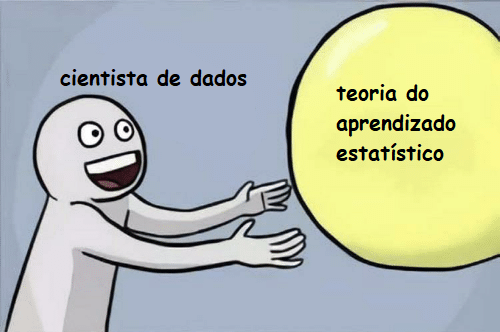

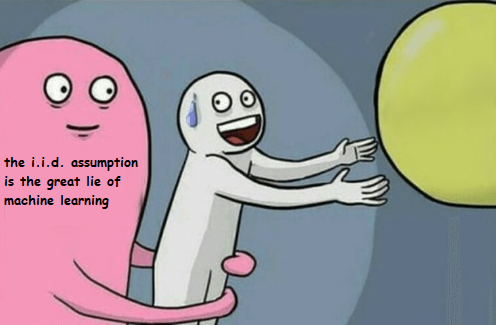

Zoubin Ghahramani: https://www.youtube.com/watch?v=x1UByHT60mQ&feature=youtu.be&t=37m34s

# Não temos ambientes identicamente distribuídos na prática

Na grande maioria das aplicações de Aprendizado de Máquina, estamos treinando em um conjunto que tem uma distribuição, mas iremos aplicá-lo em um contexto diferente, mas parecido.

- Câmeras de celular

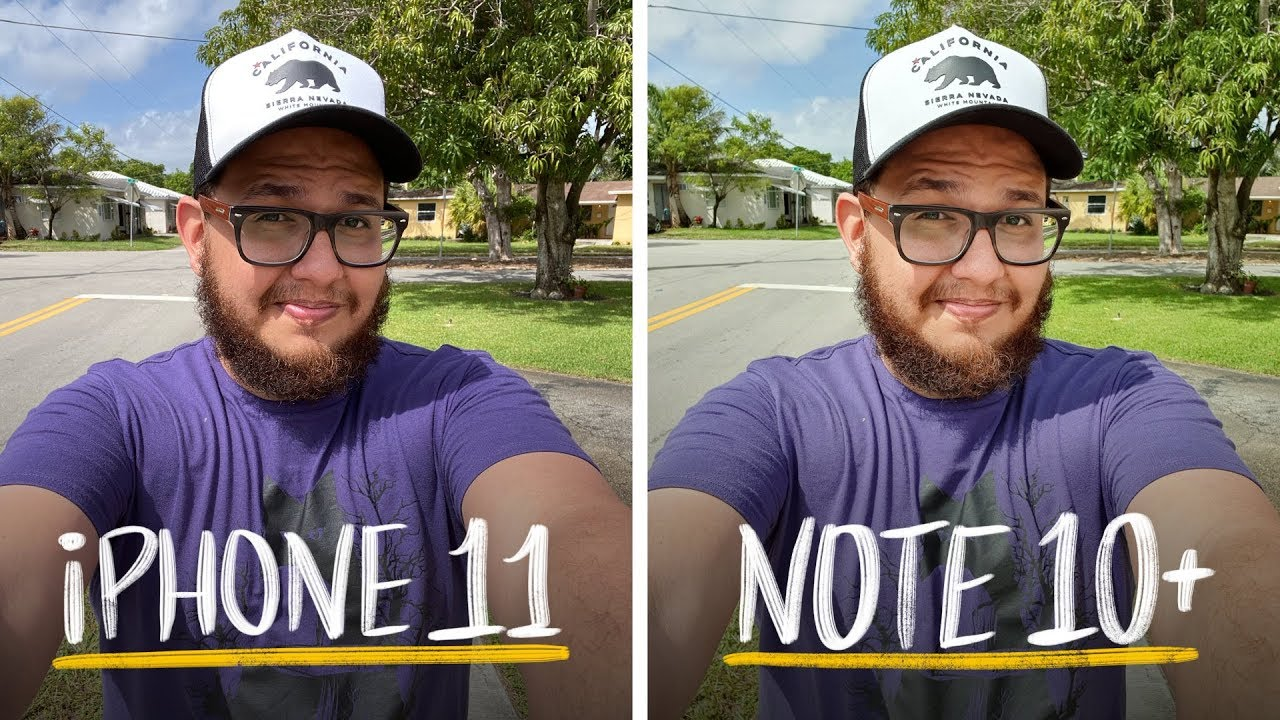

- Países diferentes
- Grupos étnicos e socioeconomicos, personas (fairness)
- Tempo

## Aprendizado Supervisionado e correlações espúrias

- Correlações espúrias podem aparecer por ambiente e não serem uma relação que se mantém em todos os contextos.

- Elas não nos garatem boas interpretações de porque a previsão está sendo feita. Quando utilizamos modelos explicativos, as correlações espúrias ficam escancaradas.

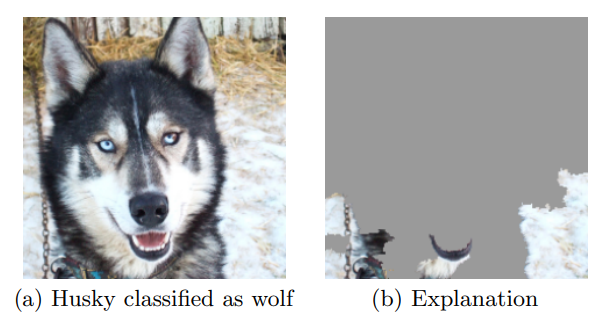

**Como formalizar o problema nesse caso? E como treinar um classificador que realmente foque em entender as relações que são robustas aos ambientes?**

# Out of distribution Risk: Aprendizado Supervisionado TO-BE (?)

Consideramos agora que não temos apenas um conjunto de treino, mas várias amostras

$$ S_e = \left(\,(x_i^e, y_i^e)\,\right)_{i=1}^{n_e} \, ,$$

coletadas de um conjunto de **ambientes** $e \in \mathcal{E}_{\,\textrm{tr}}$. Dentro de um mesmo ambiente, a amostra é dada de forma iid da variável aleatória $(X^e, Y^e)$. Para cada ambiente, temos um par $(X^e, Y^e) \sim \mathscr{D}^e$ que é diferente, mas compartilha propriedades do processo de geração das instâncias (**a escolha de ambiente deve ser feita com domain knowledge**).

Nosso objetivo é encontrar um preditor $h$ tal que $Y^e \approx h(X^e)$ para um grande conjunto de ambientes relacionados e não vistos, isto é, $e \in \mathcal{E}_{\,\textrm{all}} \supset \mathcal{E}_{\,\textrm{tr}}$.

Podemos matematizar isso como o desejo de minizar alguma quantidade do estilo de 

$$ R^{\,\textrm{OOD}} (h) = \underset{e\,\in\, \mathcal{E}_{\,\textrm{all}}}{\max} R^{\,e} (h), $$

em que agora o risco $R^{\,e}$ é definido por ambiente como 

$$R^{\,e} (h) =  \underset{(X^e,Y^e) \sim \mathscr{D}^e}{\mathbb{E}} \left[ \ell(h(X^e), Y^e) \right] . $$

## Algumas ideias: invariância

A ideia aqui é que nosso modelo aprenda uma representação que ignora correlações específicas do conjunto de dados e, em vez disso, depende das relações que afetam a target em todos os ambientes.

### Invariant Risk Minimization (IRM)

**Definição**: Dizemos que $\phi:\mathscr{X}\to\mathscr{Z}$ gera um modelo invariante $\tilde{h} \circ \phi$ em todos os ambientes $\mathcal{E}_{\,\textrm{all}}$ se existe um modelo $\tilde{h}:\mathscr{Z}\to\mathscr{Y}$ que é simultaneamente ótimo para todos os ambientes, isto é, para todo $e\in\mathcal{E}$, vale que

$$ \tilde{h} = \underset{\tilde{h}\in \tilde{\mathscr{H}} \subset \mathscr{Y}^\mathscr{Z} }{\arg\min} R^{\, e} \left(\tilde{h} \circ \phi \right) .$$

Que motiva a função objetivo do IRM dada por:

$$ \underset{\tilde{h}:\mathscr{Z}\to\mathscr{Y}}{\underset{\phi:\mathscr{X}\to\mathscr{Z}}{\min}} \sum_{e\,\in\, \mathcal{E}_{\,\textrm{all}}} R^{\,e} (\tilde{h}\circ\phi) $$

$$ \textrm{s.a. } \tilde{h} = \underset{\tilde{h}\in \tilde{\mathscr{H}} \subset \mathscr{Y}^\mathscr{Z} }{\arg\min} R^{\, e} \left(\tilde{h} \circ \phi \right) \forall e \in \mathcal{E}_\textrm{ tr}.$$

Autores demonstram por hand-wave que o IRM tem garantias teóricas boas porque o ERM se aplica ao $\tilde{h} \in \tilde{\mathscr{H}}$.

### Feature Selection

De alguma forma, gostaríamos de garantir uma representação semelhante nos diferentes ambientes. Podemos focar em olhar para variáveis que não discriminam bem se estamos em um ambiente ou outro.

- Rodo um RandomForestClassifier tentando prever de qual ambiente meu exemplo veio. Se o modelo tem boas métricas de performance, então dou uma olhada no feature importances das variáveis e possivelmente exclui algumas.


- Invariant Causal Prediction: "Causal relationships are by their definition invariant, meaning they hold true across different circumstances and environments. This is a very desirable property for machine learning systems, where we often predict on data that we have not seen in training; we need these systems to be adaptable and robust."

### Environment (Time) Robust Trees

A ideia é a mesma que a utilizada nas versões clássicas de árvores de decisão, mas para cada exemplo passamos também de qual ambiente aquele exemplo veio (originalmente a quebra é por "safras" temporais (que neste caso pode ser visto como um hiperparâmetro): dias, meses, anos, minutos, semestres).

Na escolha da _melhor quebra_, a perda de entropia é calculada utilizando alguma estatística das perdas quebradas por ambiente (média, mínimo para olhar o pior caso). Dessa forma, as quebras são escolhidas levando em conta os ganhos em todos os ambientes simultaneamente e garantindo que relações invariantes serão mantidas.

Além disso, há um novo hiperparâmetro que olha o número mínimo de exemplos de um mesmo ambiente por folha.

## Talvez não devessemos misturar tanto nossos dados...

Se temos informações sobre estarmos lidando com ambientes diferentes, talvez seja interessante usar na nossa validação.

### Out of time

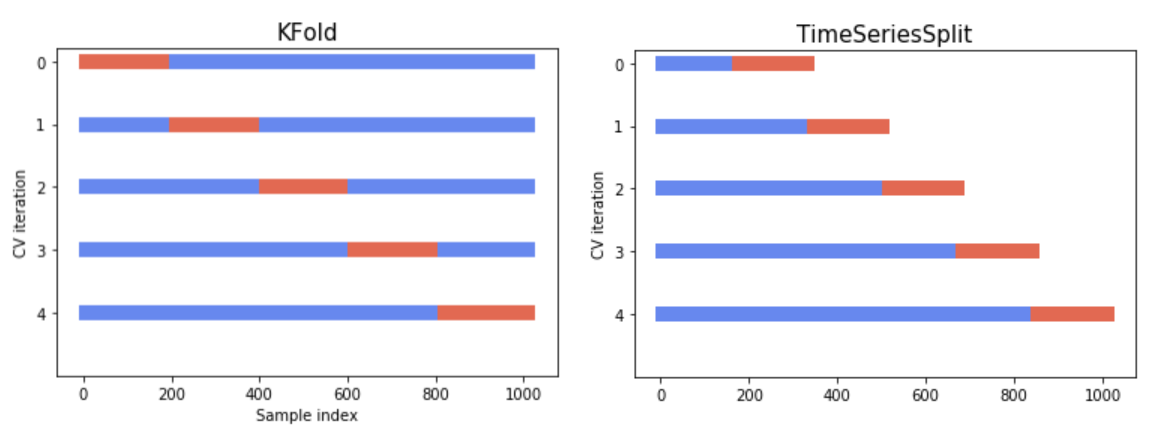

**VALIDAÇÃO DEVE REFLETIR COMO VOCÊ VAI UTILIZAR O MODELO NA PRÁTICA!**

___

# Referências:

___

**Entendendo com profundidade o caso IID:**

- Learning from Data (curso de ML da Caltech do professor Yaser Abu-Mostafa, 2012): https://work.caltech.edu/telecourse

- Foundations of Machine Learning (livro, 2012): https://cs.nyu.edu/~mohri/mlbook/

- Discussões Técnicas Cientistas e livro do Mello: (internal link)

___

**Out of Distribution Generalization**

- Causality for Machine Learning (discussão de artigos, 2020): https://ff13.fastforwardlabs.com/

- Invariant Risk Minimization (artigo, 2019): https://arxiv.org/pdf/1907.02893.pdf

- Invariant Risk Minimization (journal club, 2019): https://youtu.be/iBlCpJmaBh0

- The Risks of Invariant Risk Minimization (apresentação de artigo, 2021): https://youtu.be/Ri-1K8vd64Q

- Causality and the Machine Learning limitations for predictive tasks (meetup datarisk, 2021): https://youtu.be/NfZLFNfno2E

- Time Robust Florest (código, 2021): https://github.com/lgmoneda/time-robust-forest
___

**Assuntos ortogonais**

- “Why Should I Trust You?” Explaining the Predictions of Any Classifier (artigo, 2016): https://arxiv.org/pdf/1602.04938.pdf

- Cross Validation in Time Series (post, 2020): https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

- Covariate Shift (journal club da DPPFCRM, 2020): (internal link)

- Inferência Causal (meetup DPPFCRM, 2021): (internal link)

___